In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
DataFrame=pd.read_csv('hepatitis.csv')
DataFrame

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [3]:
DataFrame.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [4]:
DataFrame.head

<bound method NDFrame.head of      class  age  sex  steroid  antivirals  fatigue  malaise  anorexia  \
0        2   30    2        1           2        2        2         2   
1        2   50    1        1           2        1        2         2   
2        2   78    1        2           2        1        2         2   
3        2   34    1        2           2        2        2         2   
4        2   34    1        2           2        2        2         2   
..     ...  ...  ...      ...         ...      ...      ...       ...   
137      1   46    1        2           2        1        1         1   
138      2   44    1        2           2        1        2         2   
139      2   61    1        1           2        1        1         2   
140      2   53    2        1           2        1        2         2   
141      1   43    1        2           2        1        2         2   

     liver_big  liver_firm  spleen_palable  spiders  ascites  varices  \
0            1      

In [5]:
DataFrame['sex'].unique

<bound method Series.unique of 0      2
1      1
2      1
3      1
4      1
      ..
137    1
138    1
139    1
140    2
141    1
Name: sex, Length: 142, dtype: int64>

# SUBSETS

In [6]:
SEX1=DataFrame[DataFrame['sex']==1]
SEX1

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.50,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.00,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.00,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.00,75,1
5,1,51,1,1,2,1,2,1,2,2,1,1,2,2,1.42,105,85,3.81,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2,36,1,2,2,2,2,2,2,2,2,2,2,2,0.60,120,30,4.00,61,2
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.60,105,242,3.30,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.30,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.80,75,20,4.10,61,2


In [7]:
SEX2=DataFrame[DataFrame['sex']==2]
SEX2

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.00,61,1
19,2,22,2,2,1,1,2,2,2,2,2,2,2,2,0.9,48,20,4.20,64,1
23,2,25,2,1,1,2,2,2,2,2,2,2,2,2,0.4,45,18,4.30,70,1
26,2,58,2,2,2,1,2,2,2,1,2,1,2,2,1.4,175,55,2.70,36,1
30,2,41,2,2,1,1,1,1,2,2,2,2,2,2,0.7,81,53,5.00,74,1
31,2,26,2,1,2,2,2,2,2,1,2,2,2,2,0.5,135,29,3.80,60,1
35,2,20,2,1,2,1,1,1,1,1,1,1,2,2,2.3,150,68,3.90,61,1
44,2,28,2,2,2,1,1,2,2,1,2,2,2,2,1.8,191,420,3.30,46,1
55,2,45,2,1,2,1,1,2,2,2,1,2,2,2,1.0,85,75,3.81,61,1
72,2,34,2,1,1,2,2,2,2,1,2,2,2,2,0.6,30,24,4.00,76,1


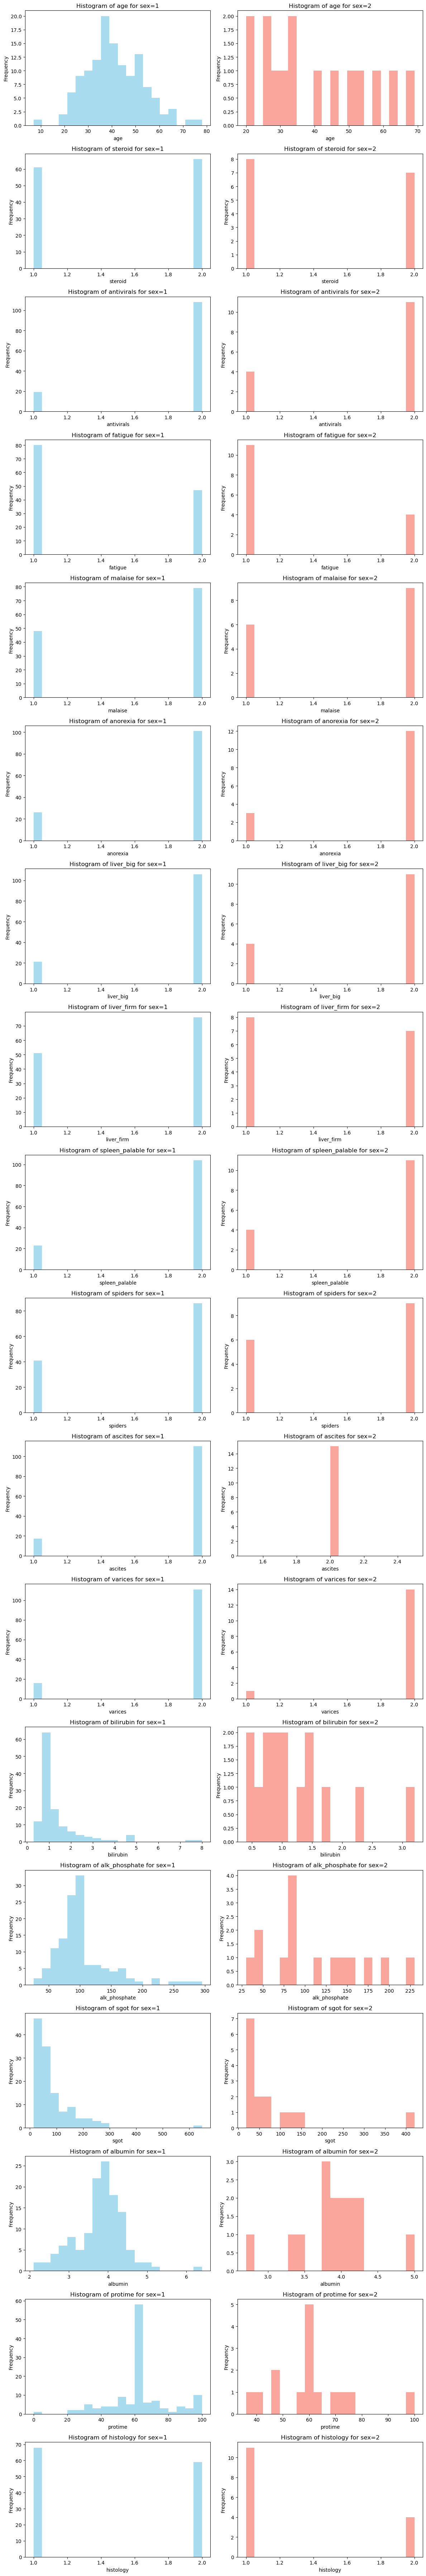

In [8]:
# Define the columns for which you want to draw histograms
columns_to_plot = ['age', 'steroid', 'antivirals', 'fatigue', 'malaise',
                   'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
                   'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
                   'protime', 'histology']

# Set up subplots
num_plots = len(columns_to_plot)
fig, axs = plt.subplots(num_plots, 2, figsize=(12, num_plots*4))

# Plot histograms for each subset
for i, col in enumerate(columns_to_plot):
    axs[i, 0].hist(SEX1[col], bins=20, color='skyblue', alpha=0.7)
    axs[i, 0].set_title(f'Histogram of {col} for sex=1')
    axs[i, 0].set_xlabel(col)
    axs[i, 0].set_ylabel('Frequency')

    axs[i, 1].hist(SEX2[col], bins=20, color='salmon', alpha=0.7)
    axs[i, 1].set_title(f'Histogram of {col} for sex=2')
    axs[i, 1].set_xlabel(col)
    axs[i, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Merge

In [9]:
Merged1=pd.concat([SEX1,SEX2])
Merged1

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.50,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.00,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.00,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.00,75,1
5,1,51,1,1,2,1,2,1,2,2,1,1,2,2,1.42,105,85,3.81,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2,62,2,2,2,1,1,2,2,1,2,1,2,2,1.30,141,156,3.90,58,1
84,2,50,2,1,2,1,2,2,1,1,1,1,2,2,0.90,230,117,3.40,41,2
107,2,69,2,2,2,1,2,2,2,2,2,2,2,2,3.20,119,136,3.81,61,2
116,2,34,2,2,2,1,1,1,1,1,2,1,2,2,0.70,70,24,4.10,100,2


# Sort

In [10]:
Sorted=DataFrame.sort_values('age')
Sorted

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
102,2,7,1,2,2,2,2,2,2,1,1,2,2,2,0.7,256,25,4.20,61,2
35,2,20,2,1,2,1,1,1,1,1,1,1,2,2,2.3,150,68,3.90,61,1
135,2,20,1,1,2,2,2,2,2,2,2,2,2,2,0.9,89,152,4.00,61,2
112,2,20,1,1,2,1,1,1,2,2,2,1,1,2,1.0,160,118,2.90,23,2
19,2,22,2,2,1,1,2,2,2,2,2,2,2,2,0.9,48,20,4.20,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2,65,1,2,2,1,1,2,2,1,1,1,1,2,0.3,180,53,2.90,74,2
15,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.30,61,1
107,2,69,2,2,2,1,2,2,2,2,2,2,2,2,3.2,119,136,3.81,61,2
123,2,72,1,2,1,1,2,2,2,1,2,2,2,2,1.0,115,52,3.40,50,2


In [11]:
Sorted=DataFrame.sort_values('sgot')
Sorted

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
75,2,23,1,2,2,1,1,1,2,2,2,2,2,2,0.8,105,14,4.80,61,1
36,2,42,1,1,2,2,2,2,2,2,2,2,2,2,1.0,85,14,4.00,100,1
64,2,39,1,2,2,1,2,2,2,2,2,2,2,2,1.0,34,15,4.00,54,1
82,1,38,1,1,2,1,1,1,2,1,2,1,1,1,1.2,118,16,2.80,61,2
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.00,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.70,54,1
96,2,51,1,1,2,1,1,1,2,1,1,1,2,1,4.6,215,269,3.90,51,2
122,2,48,1,2,2,1,1,1,2,1,2,1,2,2,2.0,158,278,3.80,61,2
44,2,28,2,2,2,1,1,2,2,1,2,2,2,2,1.8,191,420,3.30,46,1


In [12]:
Sorted=DataFrame.sort_values('protime')
Sorted

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
120,2,54,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,30,4.5,0,2
38,2,52,1,1,1,2,2,2,2,2,2,2,2,2,0.7,75,55,4.0,21,1
112,2,20,1,1,2,1,1,1,2,2,2,1,1,2,1.0,160,118,2.9,23,2
58,2,32,1,2,2,1,1,1,2,2,2,1,2,1,3.5,215,54,3.4,29,1
103,1,42,1,1,1,1,1,2,2,2,2,1,2,2,0.5,62,68,3.8,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2,34,2,2,2,1,1,1,1,1,2,1,2,2,0.7,70,24,4.1,100,2
21,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
40,2,56,1,1,2,1,2,2,2,2,2,2,2,2,0.7,71,18,4.4,100,1
89,2,30,1,1,2,1,1,2,2,1,2,1,2,2,0.8,147,128,3.9,100,2


# Transpose

In [13]:
Transposed=DataFrame.T
Transposed

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
class,2.0,2.0,2.0,2.0,2.0,1.00,2.00,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
age,30.0,50.0,78.0,34.0,34.0,51.00,23.00,39.0,30.0,39.0,...,49.0,45.0,31.0,20.0,36.0,46.0,44.0,61.0,53.0,43.0
sex,2.0,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
steroid,1.0,1.0,2.0,2.0,2.0,1.00,2.00,2.0,2.0,1.0,...,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0
antivirals,2.0,2.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
fatigue,2.0,1.0,1.0,2.0,2.0,1.00,2.00,1.0,2.0,2.0,...,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
malaise,2.0,2.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
anorexia,2.0,2.0,2.0,2.0,2.0,1.00,2.00,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
liver_big,1.0,1.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
liver_firm,2.0,2.0,2.0,2.0,2.0,2.00,2.00,1.0,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0


# Melt

In [14]:
Melting=pd.melt(DataFrame,id_vars=['class','age'],value_name='value',var_name='Metrics')
Melting

,class,age,Metrics,value
0,2,30,sex,2.0
1,2,50,sex,1.0
2,2,78,sex,1.0
3,2,34,sex,1.0
4,2,34,sex,1.0
...,...,...,...,...
2551,1,46,histology,2.0
2552,2,44,histology,2.0
2553,2,61,histology,2.0
2554,2,53,histology,2.0


# Casting

In [15]:
Casting=pd.pivot_table(DataFrame,index=['class','age'],values='histology')
Casting

histology
class age           
1     30         2.0
      31         2.0
      33         2.0
      34         1.0
      37         1.0
...              ...
2     65         2.0
      66         1.0
      69         2.0
      72         2.0
      78         1.0

[64 rows x 1 columns]

# HISTOGRAM

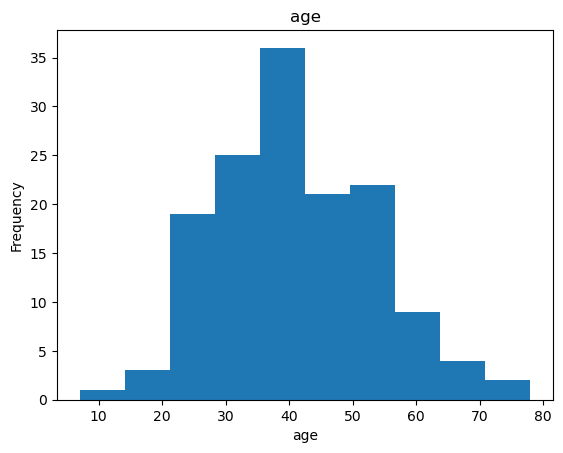

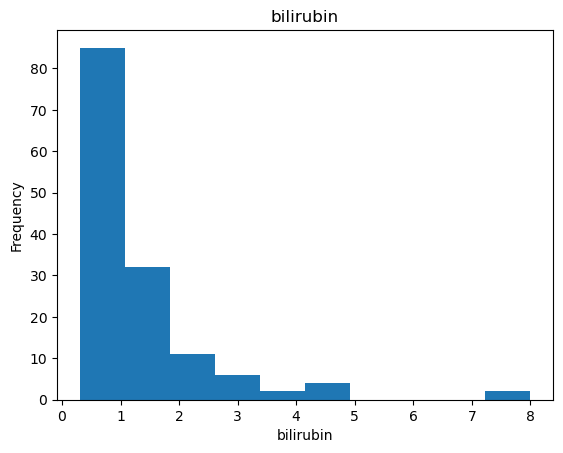

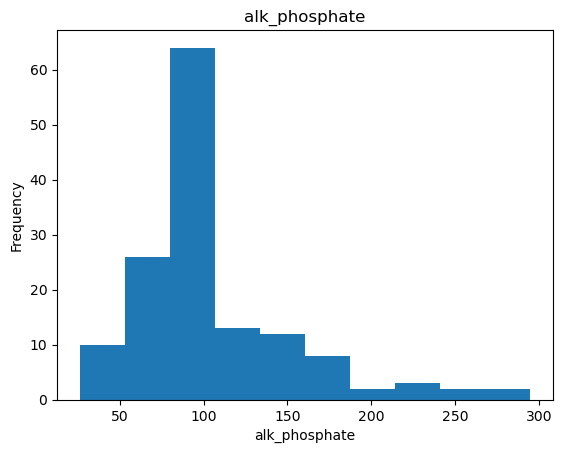

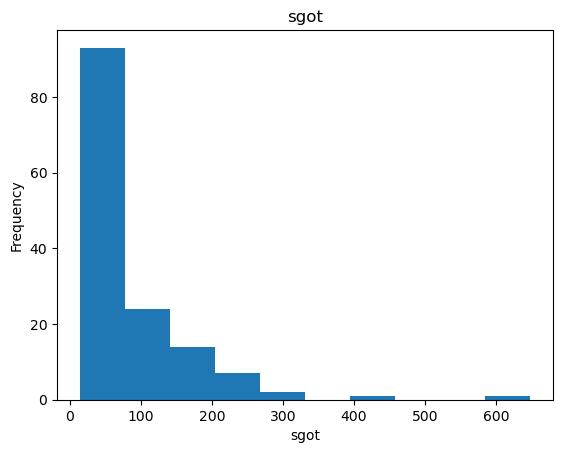

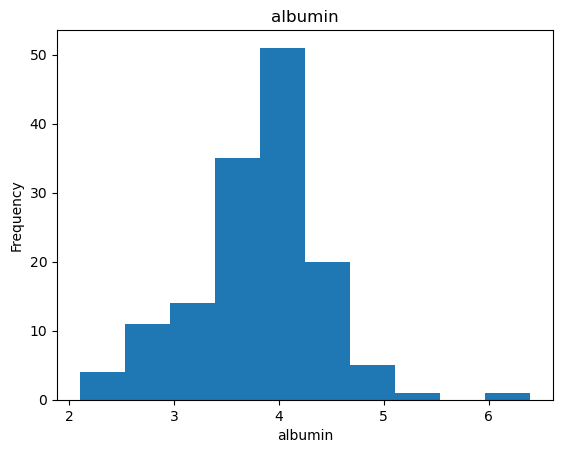

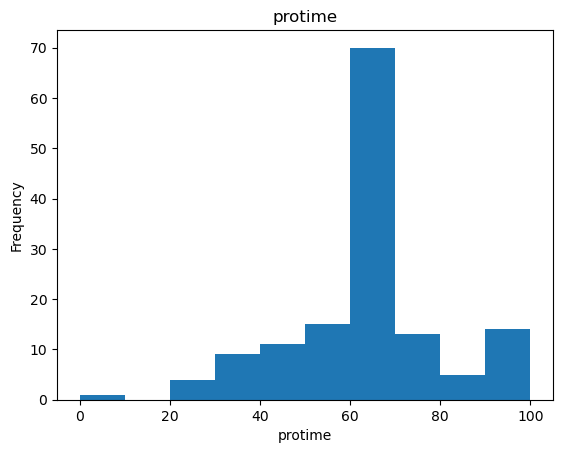

In [16]:
numerical_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
for col in numerical_cols:
    plt.hist(DataFrame[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# BAR PLOT

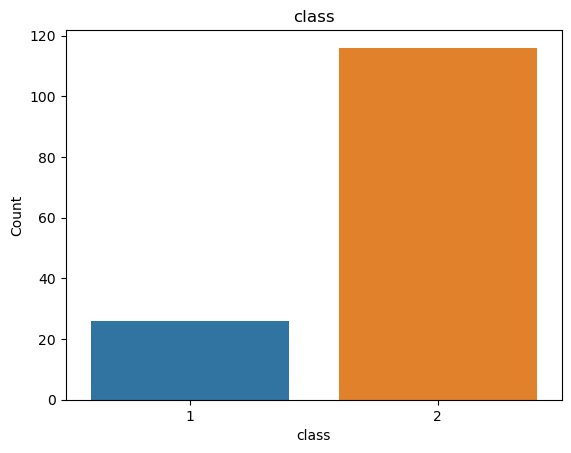

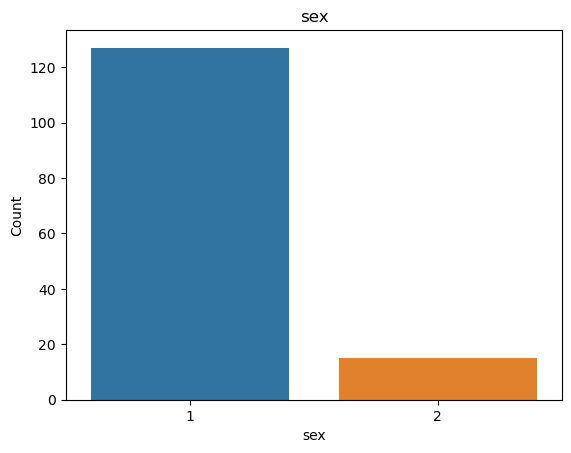

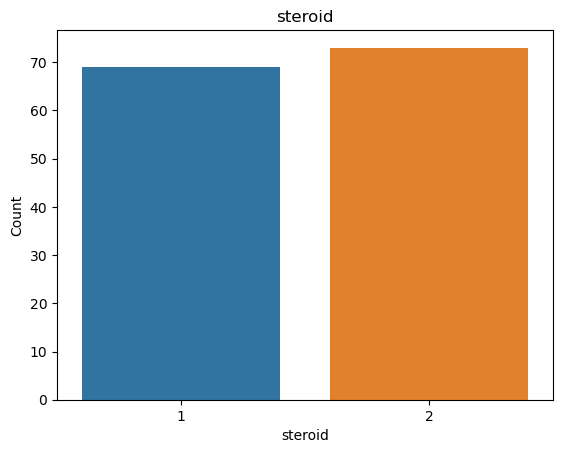

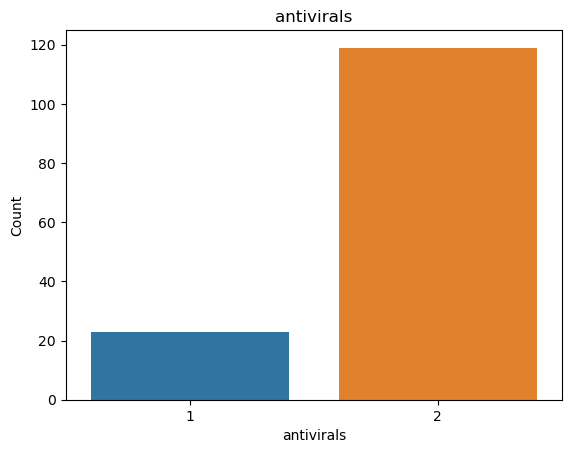

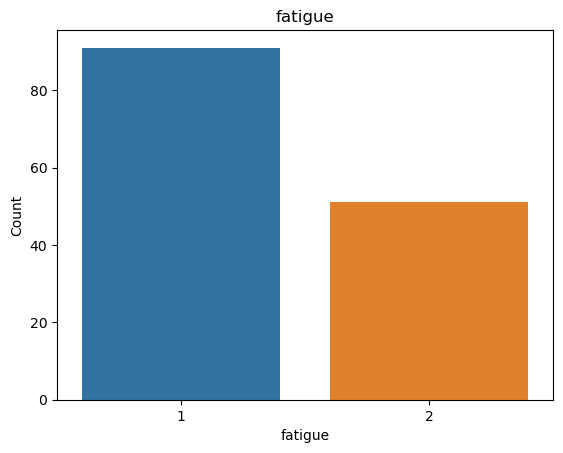

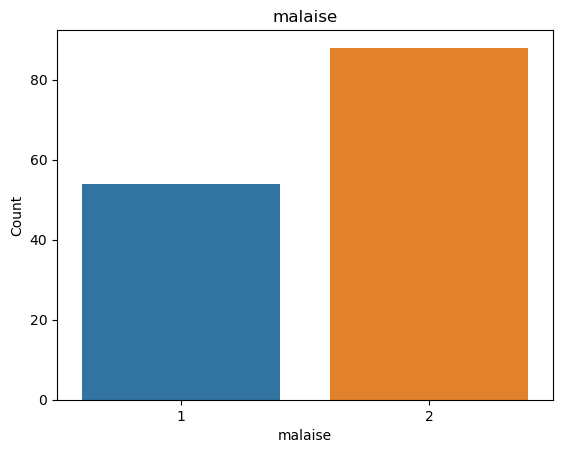

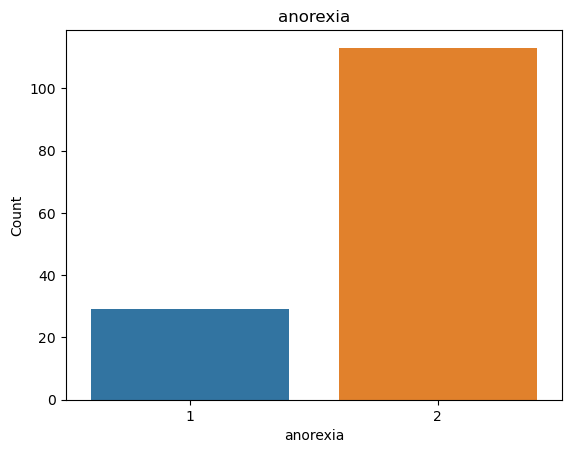

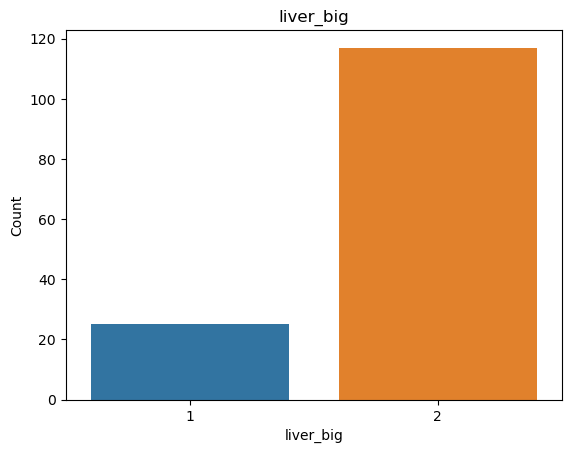

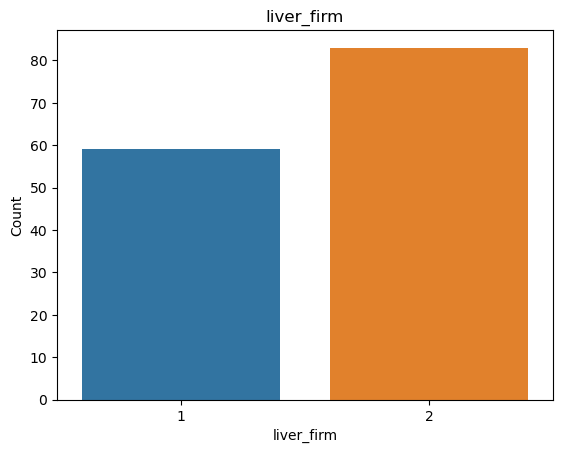

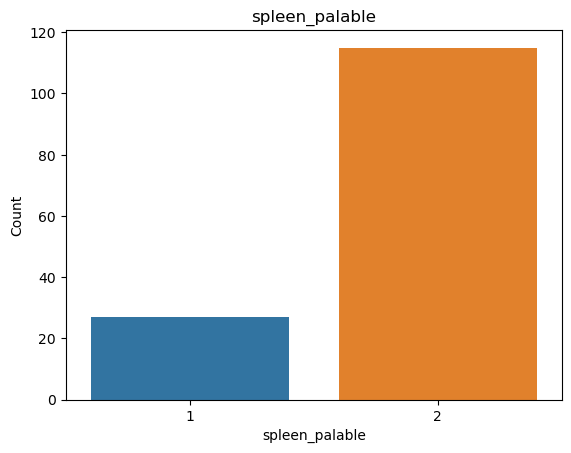

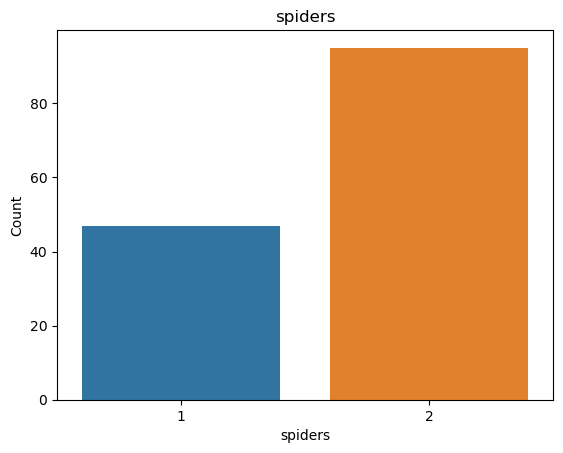

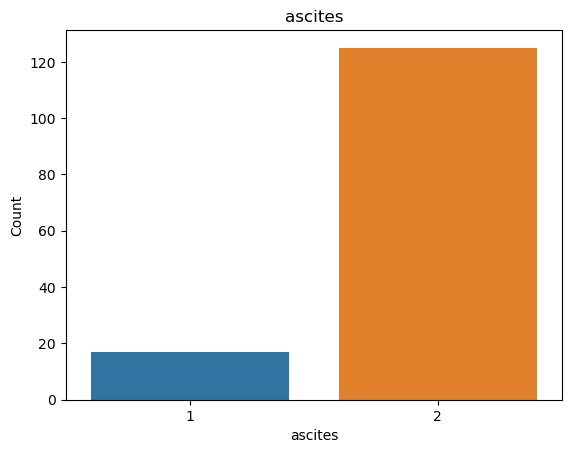

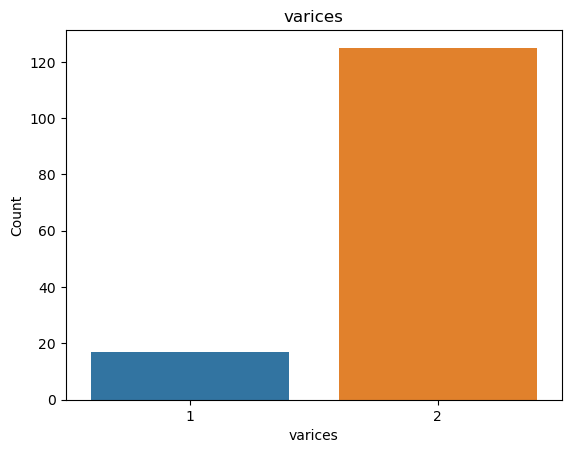

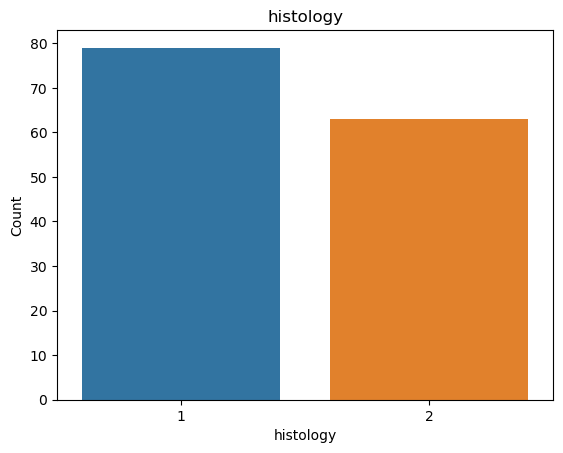

In [17]:
categorical_cols = ['class', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
                    'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites', 'varices', 'histology']
for col in categorical_cols:
    sns.countplot(x=col, data=DataFrame)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# BOX PLOT

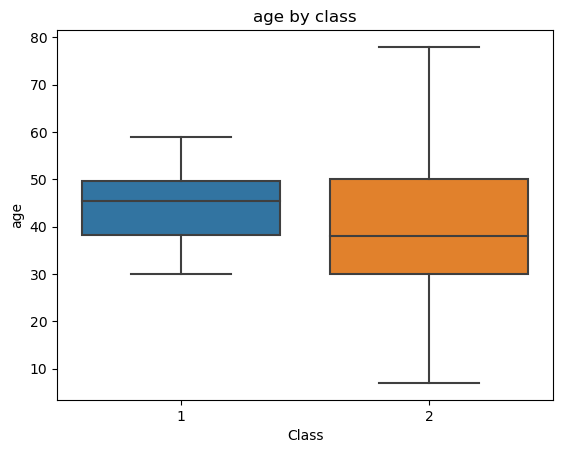

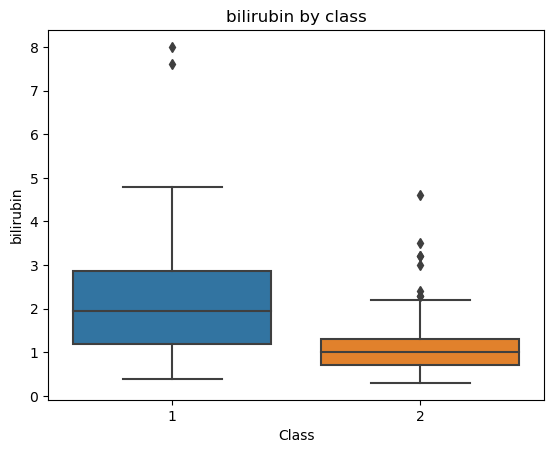

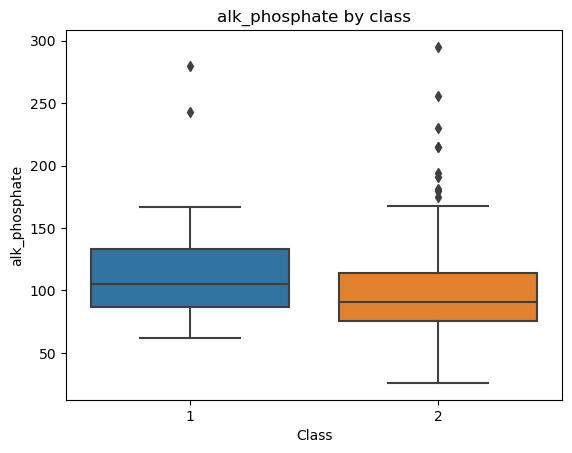

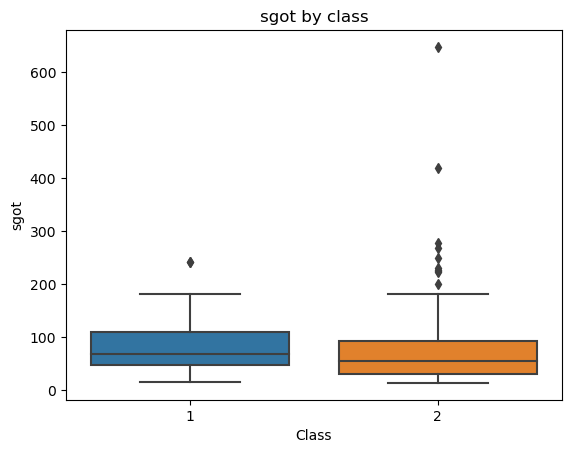

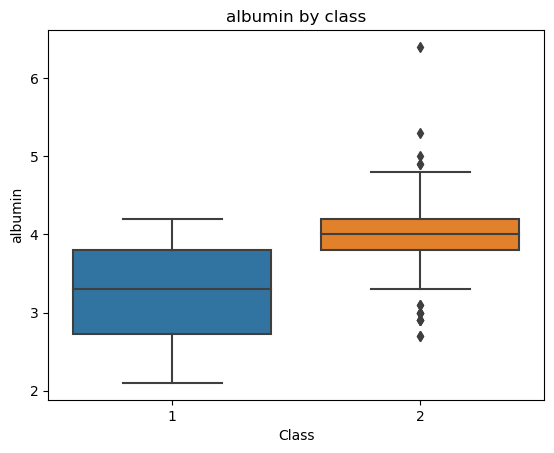

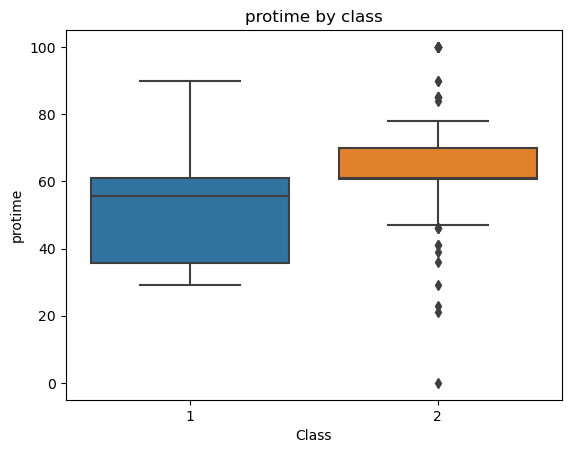

In [18]:
for col in numerical_cols:
    sns.boxplot(x='class', y=col, data=DataFrame)
    plt.title(f'{col} by class')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.show()

# HEATMAP

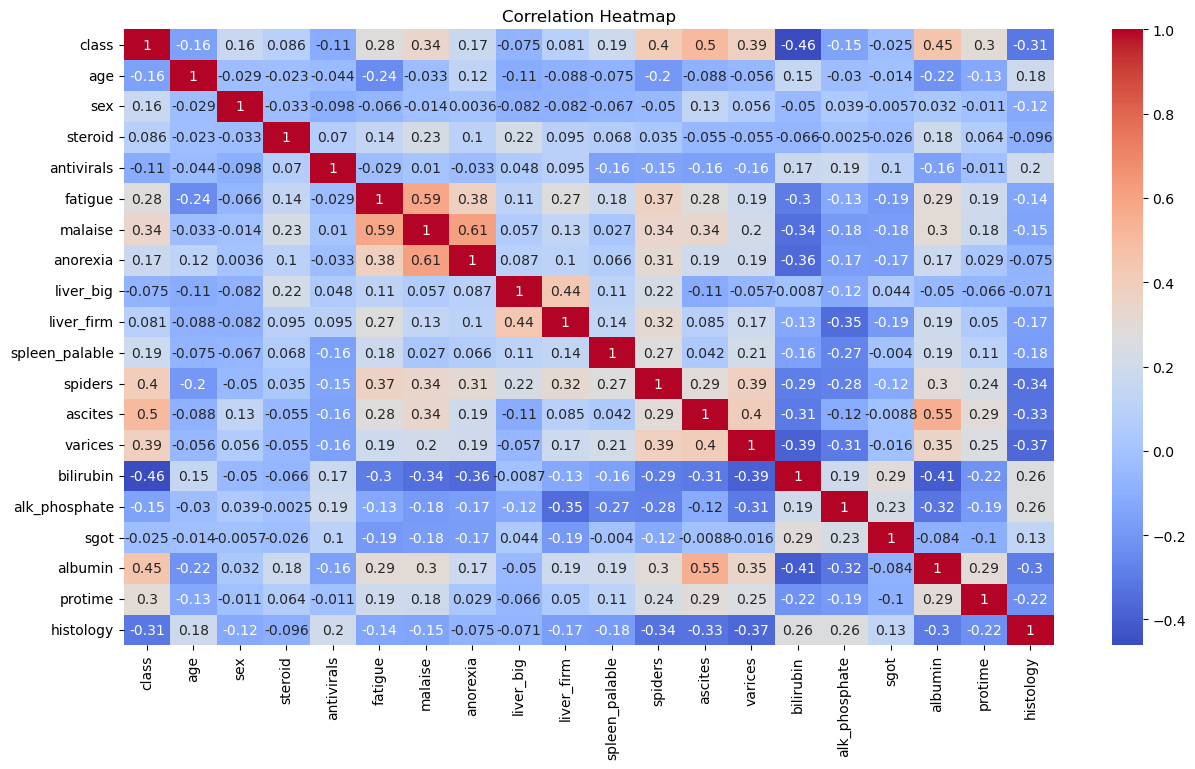

In [19]:
correlation_matrix = DataFrame.corr()

plt.figure(figsize=(15, 8))  # Adjust the size as per your requirement
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

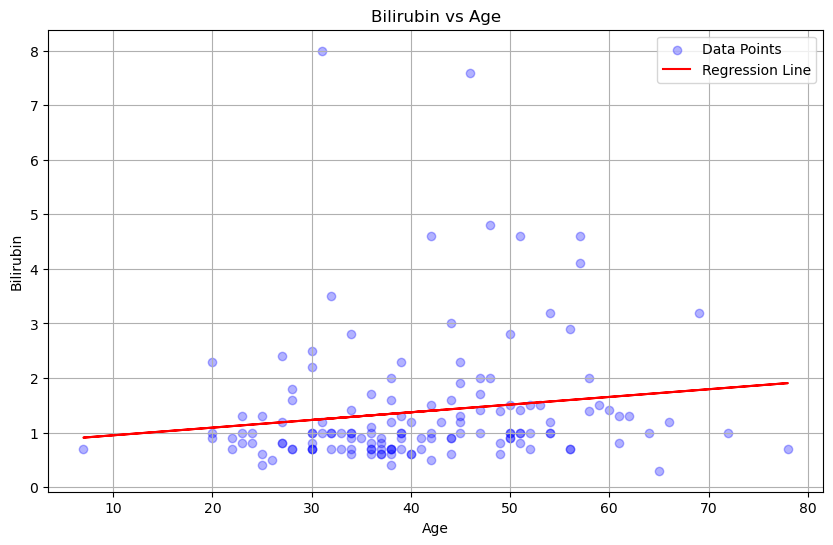

In [20]:
# Plotting
plt.figure(figsize=(10, 6))

# Extracting data
X = DataFrame['age'].values.reshape(-1, 1)  # Feature (age)
y = DataFrame['bilirubin'].values             # Target

# Fit linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Plotting the data points
plt.scatter(X, y, color='blue', alpha=0.3, label='Data Points')

# Plotting the regression line
plt.plot(X, regression_model.predict(X), color='red', label='Regression Line')

plt.title('Bilirubin vs Age')
plt.xlabel('Age')
plt.ylabel('Bilirubin')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Predictions
y_pred = regression_model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.7116224831380328
Mean Squared Error: 1.3219818595265782
Root Mean Squared Error: 1.1497746994635853
R-squared: 0.02162363036392967


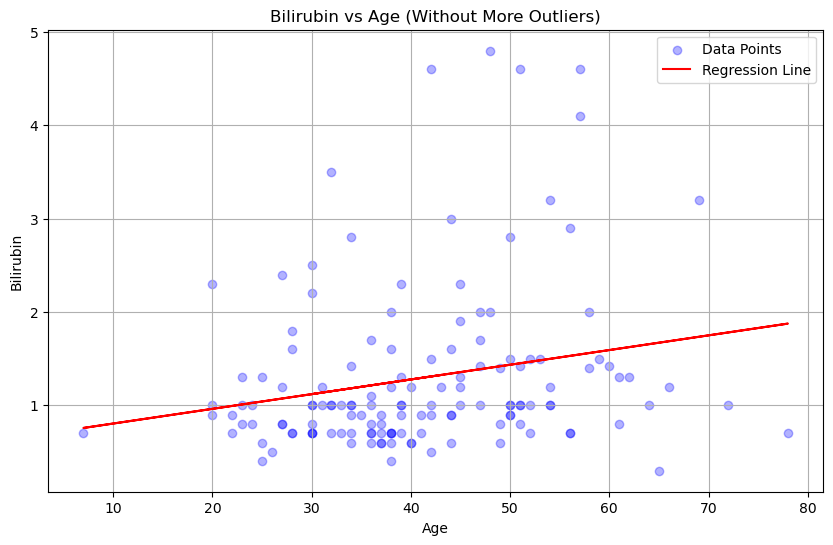

In [22]:
z_scores = (DataFrame['bilirubin'] - DataFrame['bilirubin'].mean()) / DataFrame['bilirubin'].std()

# Define threshold for outliers (e.g., z-score > 4 or < -4)
threshold = 4

# Find and remove outliers
DataFrame_no_outliers = DataFrame[(np.abs(z_scores) < threshold)]

# Plotting
plt.figure(figsize=(10, 6))

# Extracting data without outliers
X = DataFrame_no_outliers['age'].values.reshape(-1, 1)  # Feature (age)
y = DataFrame_no_outliers['bilirubin'].values             # Target

# Fit linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Plotting the data points
plt.scatter(X, y, color='blue', alpha=0.3, label='Data Points')

# Plotting the regression line
plt.plot(X, regression_model.predict(X), color='red', label='Regression Line')

plt.title('Bilirubin vs Age (Without More Outliers)')
plt.xlabel('Age')
plt.ylabel('Bilirubin')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Predictions
y_pred = regression_model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.5862491128935963
Mean Squared Error: 0.7363700388817214
Root Mean Squared Error: 0.8581200608782674
R-squared: 0.047712061367943814
